In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.simplefilter("ignore")

In [42]:
alp=0.05
col='Open'

date_min=pd.to_datetime("2020.01.01")
date_max=pd.to_datetime("2020.08.01")
date_test=pd.to_datetime("2021")

In [43]:
df=pd.read_csv("coin_Bitcoin.csv")
df['Date']=df['Date'].apply(pd.to_datetime)
df=df[(df['Date']>=date_min) & (df['Date']<=date_max)]
df=df.set_index("Date")
df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-01-01 23:59:59,2439,Bitcoin,BTC,7254.330611,7174.944153,7194.891971,7200.174393,1.856566e+10,1.305808e+11
2020-01-02 23:59:59,2440,Bitcoin,BTC,7212.155253,6935.269972,7202.551122,6985.470001,2.080208e+10,1.266994e+11
2020-01-03 23:59:59,2441,Bitcoin,BTC,7413.715099,6914.995908,6984.428612,7344.884183,2.811148e+10,1.332334e+11
2020-01-04 23:59:59,2442,Bitcoin,BTC,7427.385794,7309.514012,7345.375275,7410.656566,1.844427e+10,1.344425e+11
2020-01-05 23:59:59,2443,Bitcoin,BTC,7544.496872,7400.535561,7410.451694,7411.317327,1.972507e+10,1.344695e+11


In [44]:
def display_rolling_stats(df1,column,title=''):
    rolling_mean = df1[column].rolling(window = 12).mean()
    rolling_std = df1[column].rolling(window = 12).std()
    plt.gcf().set_size_inches((7,5))
    plt.plot(df1[column], color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Rolling Standard Deviation: '+title)
    plt.show()

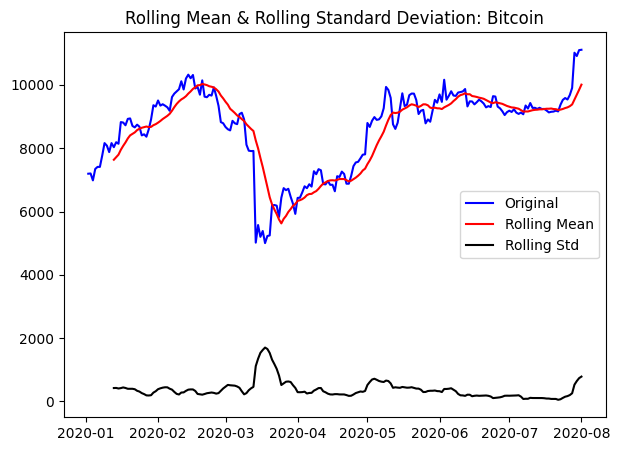

In [45]:
display_rolling_stats(df,'Open','Bitcoin')

In [46]:
def parse_data2(cols):
    fname="currencies.xls"
    df=pd.read_excel(fname)
    df=df.iloc[1:237]
    df['data']=df['data'].apply(pd.to_datetime)
    df.set_index('data')
    for x in cols:
        df[x]=df[x].astype(float)
    return df

In [47]:
df1=pd.read_csv("coin_Dogecoin.csv")
df1['Date']=df1['Date'].apply(pd.to_datetime)
df1=df1[(df1['Date']>=date_min) & (df1['Date']<=date_max)]
df1=df1.set_index("Date")
df1.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-01-01 23:59:59,2208,Dogecoin,DOGE,0.002052,0.002021,0.002028,0.002033,5.118094e+07,2.494325e+08
2020-01-02 23:59:59,2209,Dogecoin,DOGE,0.002110,0.001983,0.002034,0.002009,6.507111e+07,2.465185e+08
2020-01-03 23:59:59,2210,Dogecoin,DOGE,0.002177,0.001991,0.002008,0.002145,6.261999e+07,2.633289e+08
2020-01-04 23:59:59,2211,Dogecoin,DOGE,0.002490,0.002050,0.002144,0.002241,9.422758e+07,2.751141e+08
2020-01-05 23:59:59,2212,Dogecoin,DOGE,0.002491,0.002117,0.002240,0.002419,5.263174e+07,2.969899e+08


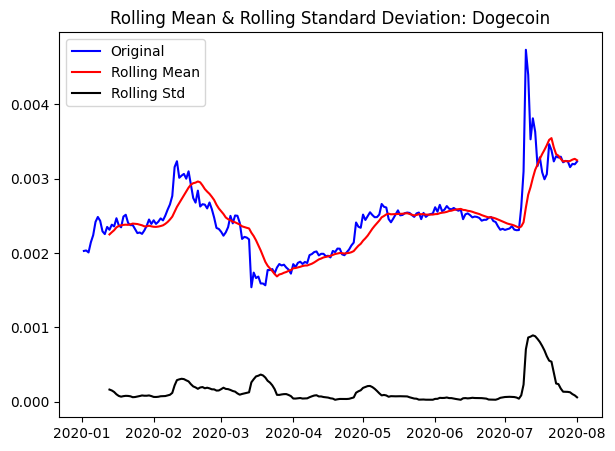

In [48]:
display_rolling_stats(df1,"Open",'Dogecoin')

In [49]:

result = adfuller(df['Open'])
print(col)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Open
ADF Statistic: -1.6244104927346166
p-value: 0.4704178131323413
Critical Values:
	1%: -3.461878735881654
	5%: -2.875403665910809
	10%: -2.574159410430839


In [50]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

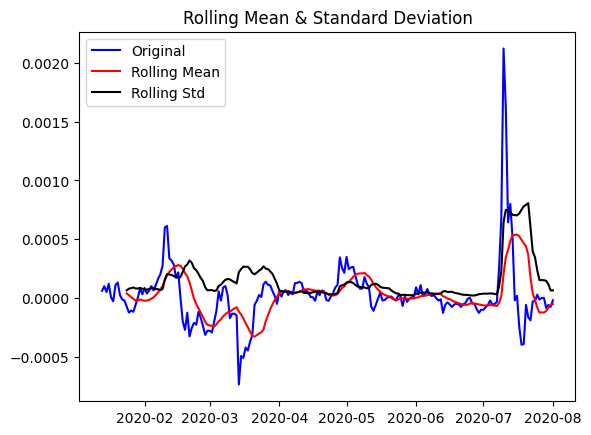

ADF Statistic: -5.3401624147136495
p-value: 4.5186348499481025e-06
Critical Values:
	1%: -3.4638151713286316
	5%: -2.876250632135043
	10%: -2.574611347821651


In [100]:
df_log = df1[col]
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

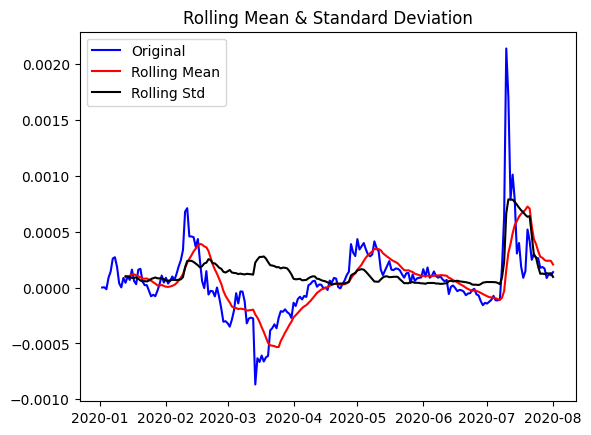

ADF Statistic: -3.8784039448020464
p-value: 0.0021996576827194776
Critical Values:
	1%: -3.4620315036789666
	5%: -2.8754705024827127
	10%: -2.5741950726860647


In [52]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

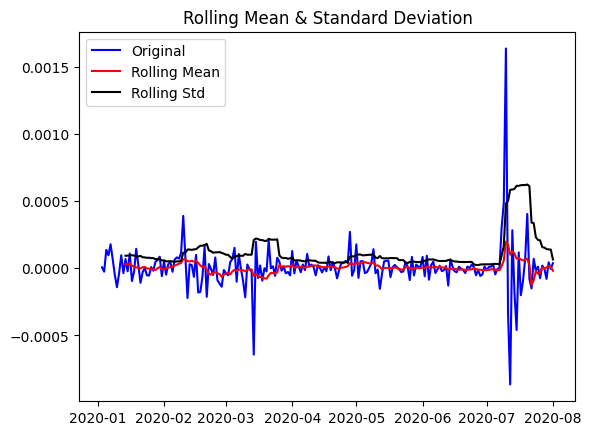

ADF Statistic: -8.418697650665228
p-value: 2.0108040347817342e-13
Critical Values:
	1%: -3.4620315036789666
	5%: -2.8754705024827127
	10%: -2.5741950726860647


In [53]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

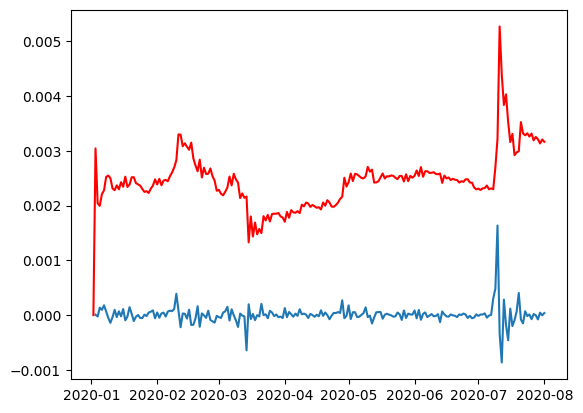

In [54]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,2,2))
results = model.fit()
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

In [79]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log.iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
#plt.plot(df_log)

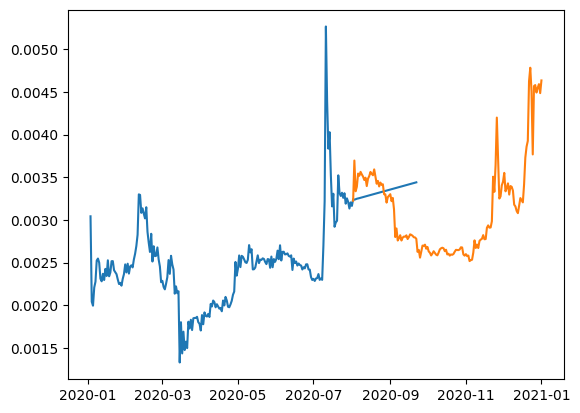

In [109]:
plt.plot(results.predict(1,264))
plt.plot(test('Open'))
plt.show()

In [106]:
def test(col):
    df_test=pd.read_csv("coin_Dogecoin.csv")
    df_test['Date']=df_test['Date'].apply(pd.to_datetime)
    df_test=df_test[(df_test['Date']>=date_max) & (df_test['Date']<=date_test)]
    df_test=df_test.set_index("Date")[col]
    
    rolling_mean = df_test.rolling(window=12).mean()
    df_log_minus_mean = df_test - rolling_mean
    df_log_minus_mean.dropna(inplace=True)
    predictions_ARIMA_log = pd.Series(df_test.iloc[0], index=df_test.index)
    return df_test

df_test=test('Open')